In [119]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#feature_columns = ['age', 'martial-status', 'year od education', 'hours-per-week','occupation',]

In [120]:
#Reading the dataset 
data=pd.read_csv("adult.csv")
data.head

<bound method NDFrame.head of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marrie

##### We Use Head To Show First 5 Entries of the Dataset And tail for the last 5 entries



In [4]:
#to find the info of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
#checking the sum of the null values 
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
#finding duplicates
data.duplicated().sum()

52

In [7]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include='all').T

count unique                 top   freq           mean  \
age              48790.0    NaN                 NaN    NaN      38.652798   
workclass          48790      9             Private  33860            NaN   
fnlwgt           48790.0    NaN                 NaN    NaN  189668.999365   
education          48790     16             HS-grad  15770            NaN   
educational-num  48790.0    NaN                 NaN    NaN      10.078807   
marital-status     48790      7  Married-civ-spouse  22366            NaN   
occupation         48790     15      Prof-specialty   6165            NaN   
relationship       48790      6             Husband  19703            NaN   
race               48790      5               White  41714            NaN   
gender             48790      2                Male  32614            NaN   
capital-gain     48790.0    NaN                 NaN    NaN    1080.217688   
capital-loss     48790.0    NaN                 NaN    NaN      87.595573   
hours-per-week   48790.0    NaN                 NaN    NaN      40.425886   
native-country     48790     42       United-States  43792            NaN   
income             48790      2               <=50K  37109            NaN   

                           std      min       25%       50%        75%  \
age                  13.708493     17.0      28.0      37.0       48.0   
workclass                  NaN      NaN       NaN       NaN        NaN   
fnlwgt           105617.231232  12285.0  117555.0  178138.5  237606.25   
education                  NaN      NaN       NaN       NaN        NaN   
educational-num       2.570046      1.0       9.0      10.0       12.0   
marital-status             NaN      NaN       NaN       NaN        NaN   
occupation                 NaN      NaN       NaN       NaN        NaN   
relationship               NaN      NaN       NaN       NaN        NaN   
race                       NaN      NaN       NaN       NaN        NaN   
gender                     NaN      NaN       NaN       NaN        NaN   
capital-gain       7455.905921      0.0       0.0       0.0        0.0   
capital-loss        403.209129      0.0       0.0       0.0        0.0   
hours-per-week       12.392729      1.0      40.0      40.0       45.0   
native-country             NaN      NaN       NaN       NaN        NaN   
income                     NaN      NaN       NaN       NaN        NaN   

                       max  
age                   90.0  
workclass              NaN  
fnlwgt           1490400.0  
education              NaN  
educational-num       16.0  
marital-status         NaN  
occupation             NaN  
relationship           NaN  
race                   NaN  
gender                 NaN  
capital-gain       99999.0  
capital-loss        4356.0  
hours-per-week        99.0  
native-country         NaN  
income                 NaN

In [10]:
#to check trow and the column
data.shape

(48790, 15)

In [11]:
#to find the uniques values
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [12]:
# look at categorical features
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

for i in cat_columns:
    unique_values = data[i].unique()
    print(i)
    print(unique_values)

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender
['Male' 'Female']
native-country
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

### Value Count function

In [146]:
data['income'].value_counts(normalize=True)

income
0    0.760718
1    0.239282
Name: proportion, dtype: float64

### Filling ? VAlues

In [147]:
# Fill missing categorical values with the mode
for col in ['workclass', 'occupation', 'native-country']:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('?', mode_value)

In [148]:
data.head()

age  workclass  fnlwgt     education  educational-num marital-status  \
0   25    Private  226802          11th                7    not-married   
1   38    Private   89814       HS-grad                9        Married   
2   28  Local-gov  336951    Assoc-acdm               12        Married   
3   44    Private  160323  Some-college               10        Married   
4   18    Private  103497  Some-college               10    not-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States      0  
1              50  United-States      0  
2              40  United-States      1  
3              40  United-States      1  
4              30  United-States      0

### Feature Engineering

In [149]:
#Education category
data.education=data.education.replace(['Preschool','ist-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
data.education=data.education.replace('HS-grad','high-school')
data.education=data.education.replace(['Assoc-acdm','Assoc-voc','Prof-school','Some-college'],'Higher') 
data.education=data.education.replace('Bachelor','undergrade') 
data.education=data.education.replace('Masters','Grade')
data.education=data.education.replace('Doctorate','Doc')
                                       

In [150]:
data['marital-status'].value_counts()

marital-status
Married        22416
not-married    16117
other          10309
Name: count, dtype: int64

In [151]:
# marital Status
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse',],'Married')
data['marital-status']=data['marital-status'].replace(['Never-married'],'not-married')
data['marital-status']=data['marital-status'].replace(['Divorced','Separated','Married-spouse-absent','Widowed'],'other')

The dataset is complex due to the various classes and statuses in the education and marital status features. To simplify the analysis, we performed feature engineering by grouping pre-school to 12 into the school category in education, and grouping Married-civ-spouse and Married-AF-spouse into married, and Divorced, Separated, Married-spouse-absent, and Widowed into other in marital status. This makes the report easier for non-technical individuals to understand.

In [152]:
# plt.figure(figsize=(20,5))                                                                                                                                                                                                
#sns.countplot(x=data['age'])
#plt.title('Age Distribution')

In [153]:
'''Age_category = []
for age in data['age']:
    if age <= 19:
        Age_category.append('Teen')
    elif age > 19 and age <= 35:
        Age_category.append('Young')
    elif age > 35 and age <= 50:
        Age_category.append('Adult')
    elif age > 50:
        Age_category.append('Old')
data.insert(1,'Age_category',Age_category)
data.drop('age',inplace = True,axis = 1)'''

"Age_category = []\nfor age in data['age']:\n    if age <= 19:\n        Age_category.append('Teen')\n    elif age > 19 and age <= 35:\n        Age_category.append('Young')\n    elif age > 35 and age <= 50:\n        Age_category.append('Adult')\n    elif age > 50:\n        Age_category.append('Old')\ndata.insert(1,'Age_category',Age_category)\ndata.drop('age',inplace = True,axis = 1)"

In [154]:
#plt.figure(figsize=(20,5))                                                                                                                                                                                                
#sns.countplot(x=data['Age_category'])
#plt.title('Age Distribution')

In [155]:
#income
data.income=data.income.replace('<=50K','0')
data.income=data.income.replace('>50K','1')

In [156]:
data.head()

age  workclass  fnlwgt    education  educational-num marital-status  \
0   25    Private  226802       School                7    not-married   
1   38    Private   89814  high-school                9        Married   
2   28  Local-gov  336951       Higher               12        Married   
3   44    Private  160323       Higher               10        Married   
4   18    Private  103497       Higher               10    not-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States      0  
1              50  United-States      0  
2              40  United-States      1  
3              40  United-States      1  
4              30  United-States      0

### Data Visualization

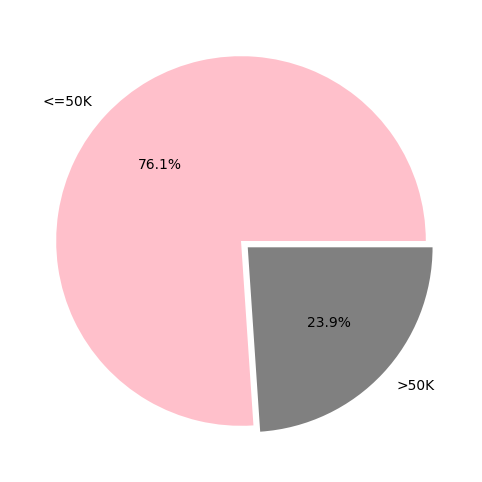

In [157]:
plt.figure(figsize=(10,6))
labels=['<=50K','>50K']
explode=[.0,.05]
mycolors=['pink','Grey']
sizes=data['income'].value_counts()
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

This code creates a pie chart to visualize the distribution of income levels categorized as <=50K and >50K. The chart uses 
pink and grey colors, with a slight explosion effect to highlight the '>50K' section. The percentages displayed on the chart 
represent the proportion of each income category in the dataset, giving a quick visual understanding of the income distribution

## Univariate Analysis

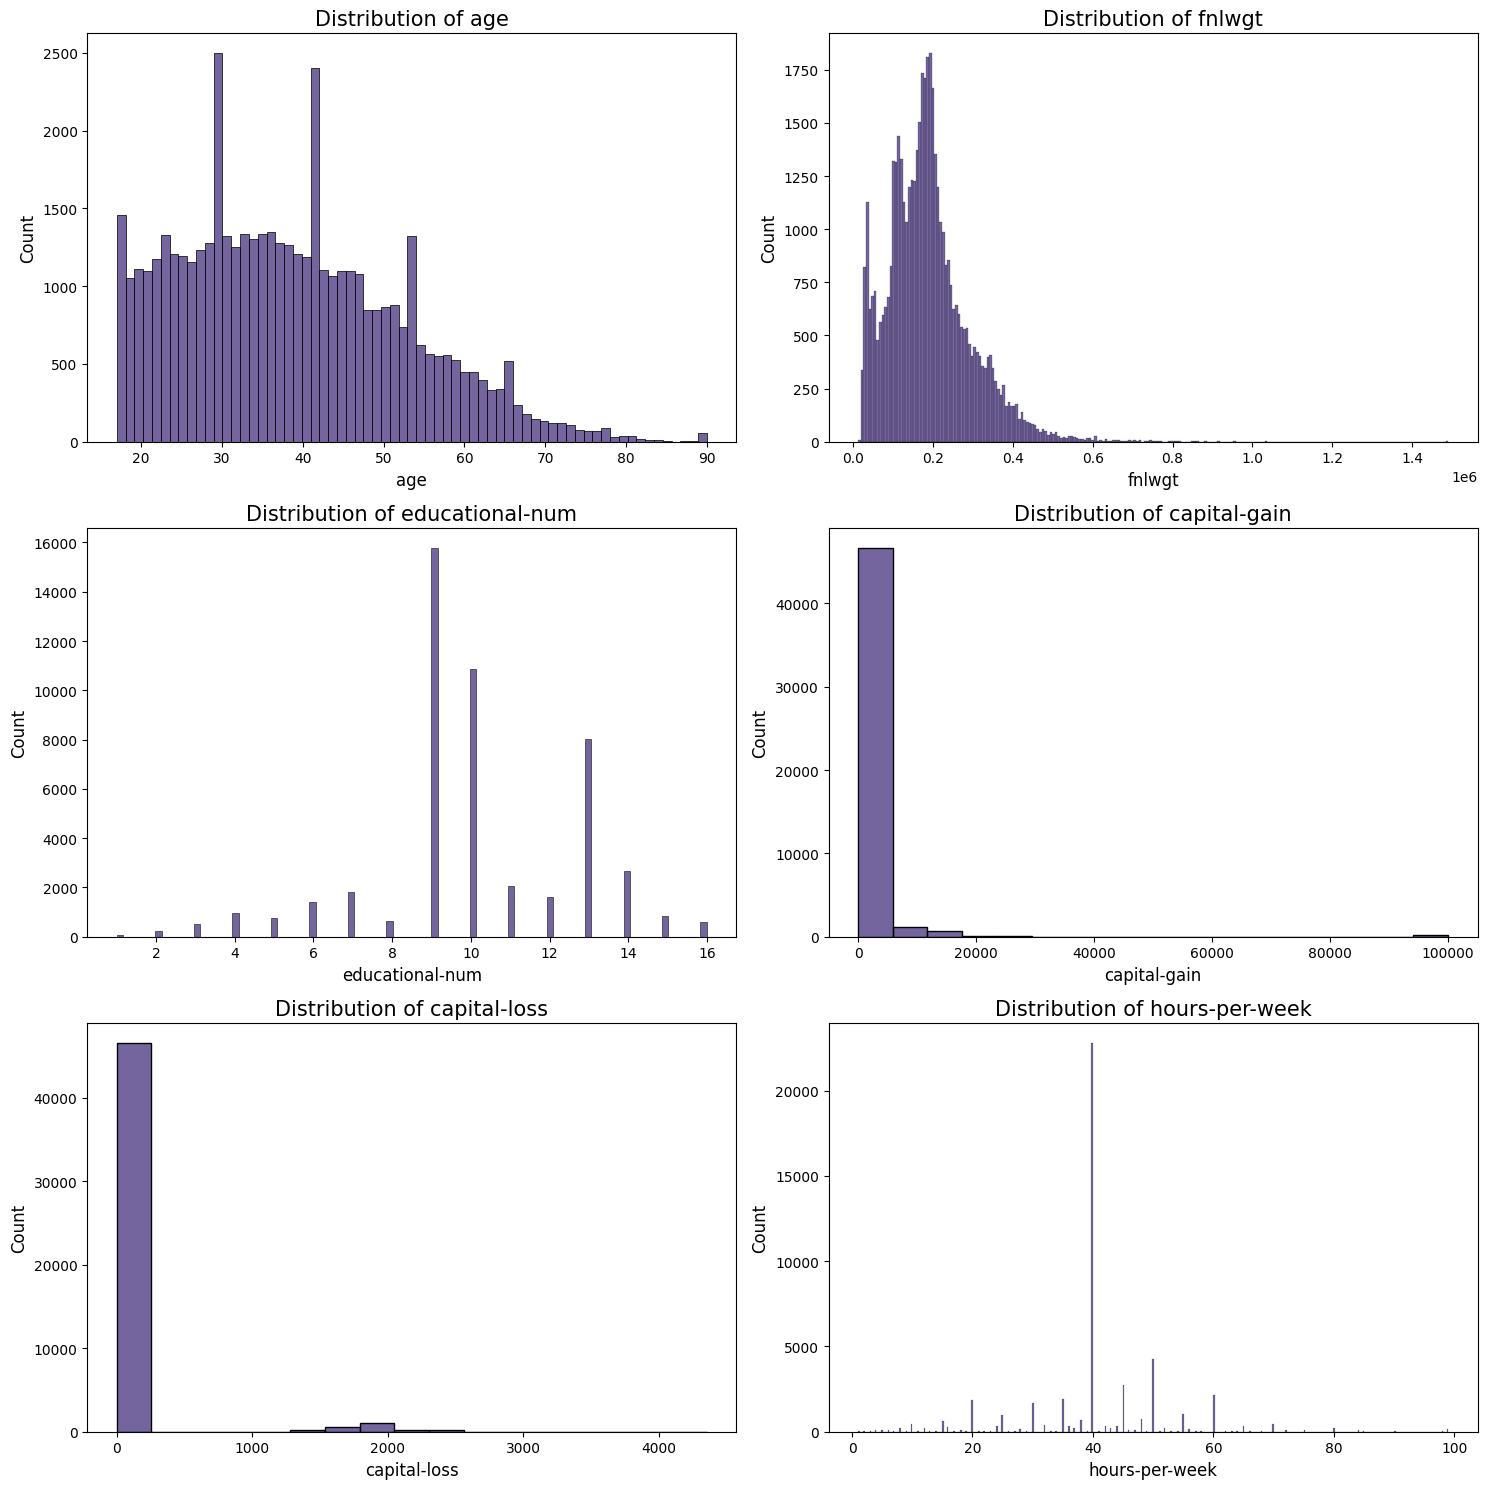

In [158]:
# Visualize the distribution of numerical features
numerical_columns = data.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Box Plot

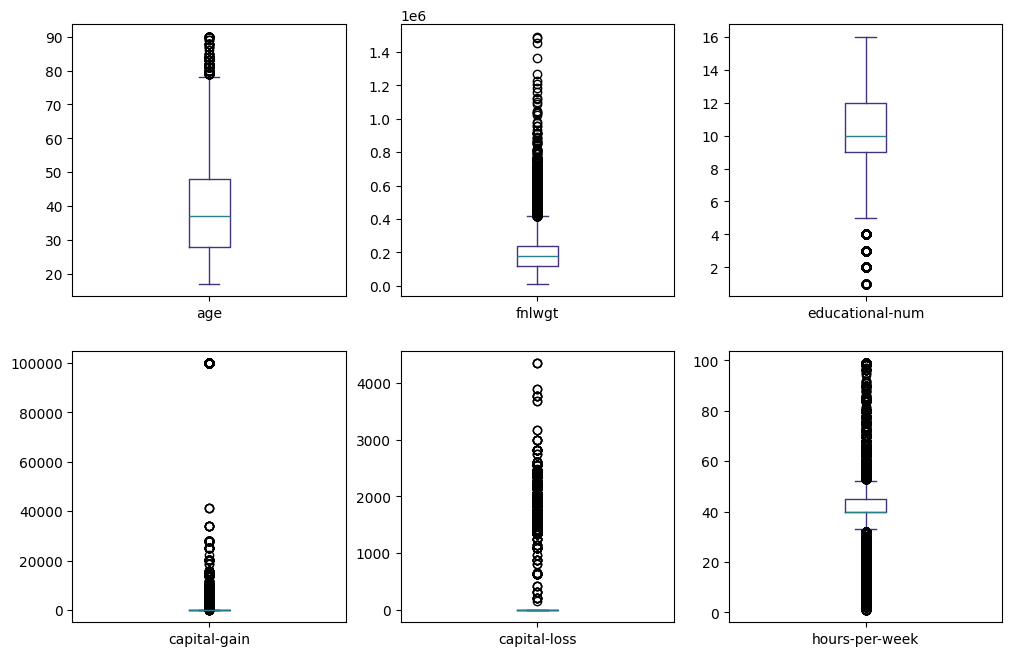

In [159]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)
plt.show()

We created Boxplots to identify and address outliers in order to improve prediction accuracy. It is clear that every feature 
contains outliers. 

### Removing the Outliers

In [160]:
Q1=data['age'].quantile(.25)
Q3=data['age'].quantile(.75)
Q1,Q3

(28.0, 48.0)

In [161]:
IQR=Q3-Q1
IQR

20.0

In [162]:
Upperbound=Q3+3*IQR
lowerbound=Q1-3*IQR
Upperbound,lowerbound

(108.0, -32.0)

In [163]:
data=data[(data['age']>=lowerbound)&(data['age']<=Upperbound)]
 

In [164]:
Q1=data['hours-per-week'].quantile(.10)
Q3=data['hours-per-week'].quantile(.75)
Q1,Q3


(24.0, 45.0)

In [165]:
IQR=Q3-Q1
IQR

21.0

In [166]:
Upperbound=Q3+3*IQR
lowerbound=Q1-3*IQR
Upperbound,lowerbound

(108.0, -39.0)

In [167]:
data=data[(data['hours-per-week']>=lowerbound)&(data['hours-per-week']<=Upperbound)]

In [168]:
Q1=data['fnlwgt'].quantile(.25)
Q3=data['fnlwgt'].quantile(.75)
Q1,Q3

(117550.5, 237642.0)

In [169]:
IQR=Q3-Q1
IQR


120091.5

In [170]:
Upperbound=Q3+3*IQR
lowerbound=Q1-3*IQR
Upperbound,lowerbound

(597916.5, -242724.0)

In [171]:
data=data[(data['fnlwgt']>=lowerbound)&(data['fnlwgt']<=Upperbound)]

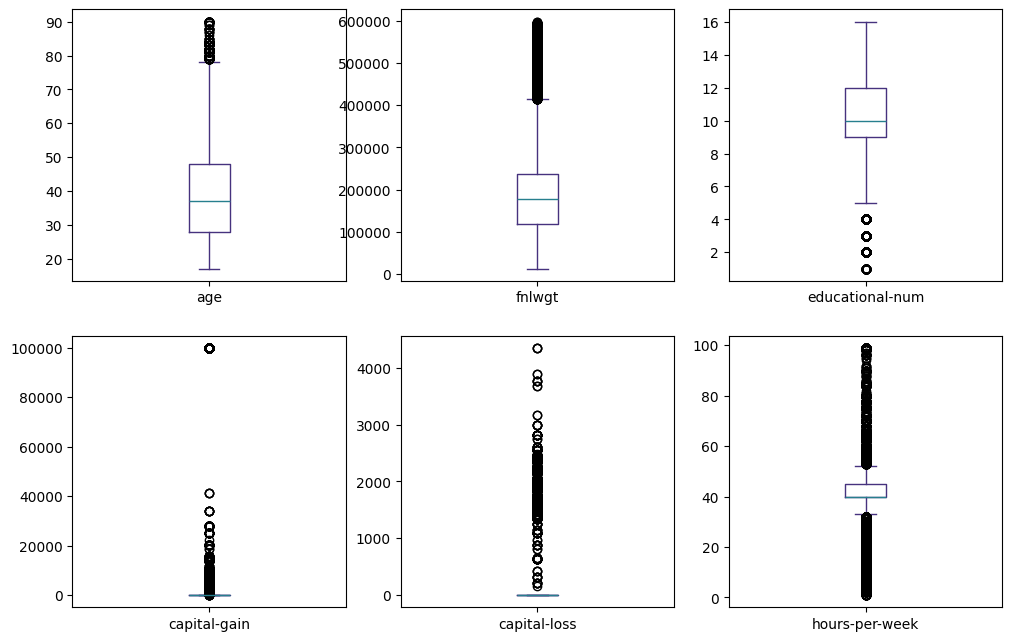

In [172]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)
plt.show()

## Bivariate analysis

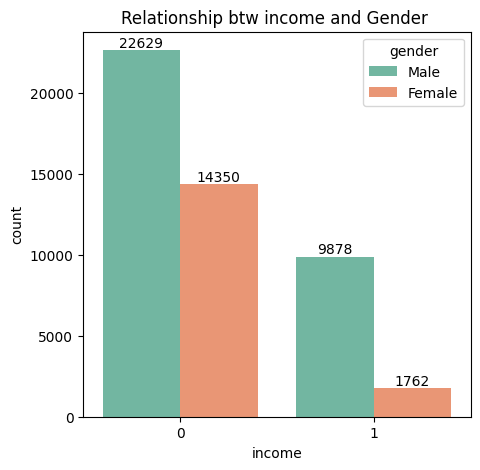

In [173]:
# Countplot for Income values
plt.figure(figsize=(5, 5))
ax=sns.countplot(x='income',data=data, hue='gender',palette="Set2")
plt.title("Relationship btw income and Gender ")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

The graph shows the relationship between income and gender.More males than females are in the highest income bracket.More 
females than males are in the lowest income bracket.The overall distribution of income is skewed to the right, meaning that 
there are more people in the lower income brackets than in the higher income brackets.

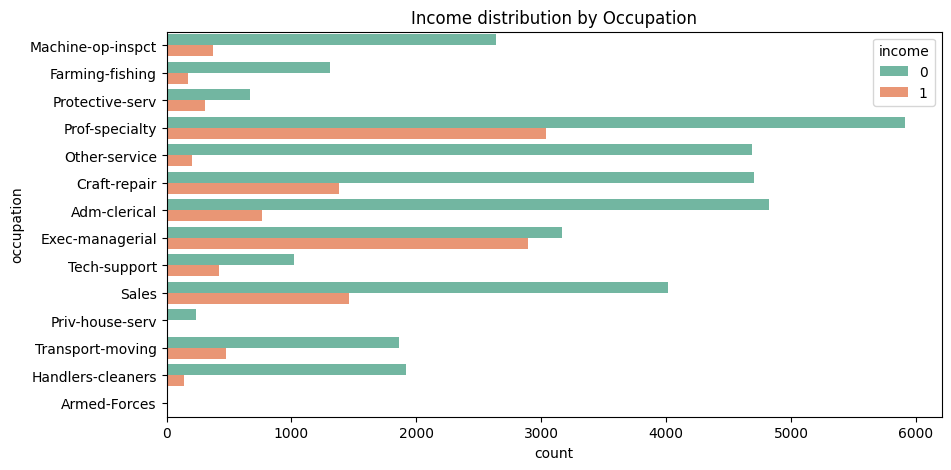

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(y='occupation', hue='income', data=data ,palette="Set2")
plt.title('Income distribution by Occupation')
for label in ax.containers:
    ax.bar_label(label)
plt.show()


In [ ]:
The graph compares the number of people employed in various occupations in the US and their corresponding salaries. It shows
that specialty professionals occupations earn more than those in protective services.

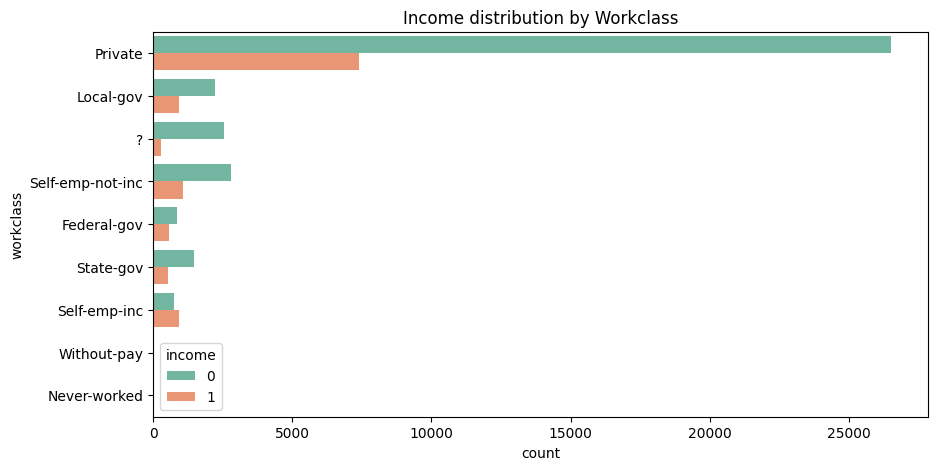

In [141]:
# Bivariate analysis with income for more insights
plt.figure(figsize=(10,5))
sns.countplot(y='workclass', hue='income', data=data,palette="Set2")
plt.title('Income distribution by Workclass')
plt.show()



The graph shows the number of people employed in different industries in the US, with comparison of their salaries. It is evident that the majority of people work in the private sector and earn higher incomes compared to self-employed individuals and those working for the federal government are more likely to have lower incomes.

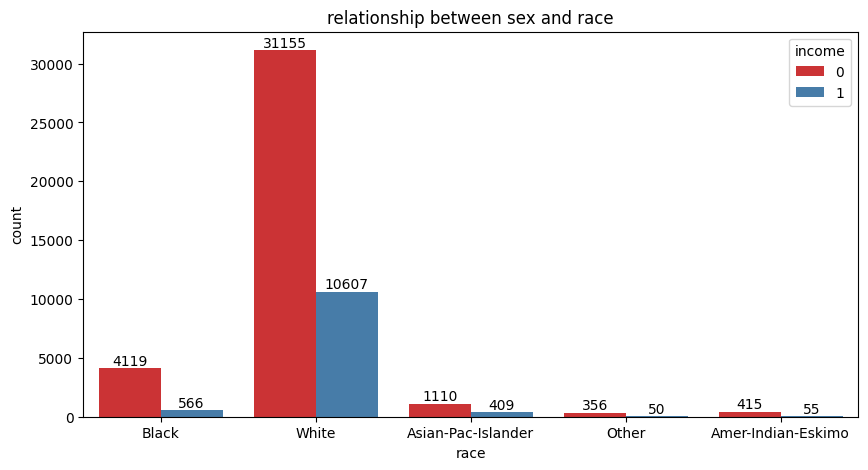

In [143]:
### Count Plot 
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='race',data=data, hue='income',palette="Set1")
plt.title("relationship between sex and race")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

This graph shows that white people are wealthier than other groups and also they are more numerous.

In [43]:
df=data.corr(numeric_only=True)
df

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.076930         0.030657      0.077233   
fnlwgt          -0.076930  1.000000        -0.039908     -0.002036   
educational-num  0.030657 -0.039908         1.000000      0.125201   
capital-gain     0.077233 -0.002036         0.125201      1.000000   
capital-loss     0.056618 -0.002732         0.080714     -0.031512   
hours-per-week   0.071154 -0.014896         0.143202      0.082293   

                 capital-loss  hours-per-week  
age                  0.056618        0.071154  
fnlwgt              -0.002732       -0.014896  
educational-num      0.080714        0.143202  
capital-gain        -0.031512        0.082293  
capital-loss         1.000000        0.054458  
hours-per-week       0.054458        1.000000

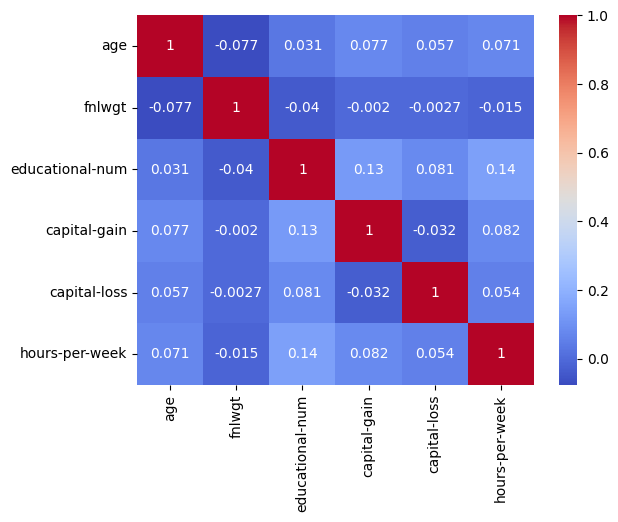

In [44]:

sns.heatmap(df,annot=True,cmap='coolwarm');

In [ ]:
We have a heatmap showing the impact of features on the target value. Many of them have a positive impact, such as 
educational-num, age, and capital-loss. However, fnlwgt has a negative impact. If we want to drop fnlwgt, we can do so.

In [45]:
data.drop(columns=['fnlwgt'])


age     workclass    education  educational-num marital-status  \
0       25       Private       School                7    not-married   
1       38       Private  high-school                9        Married   
2       28     Local-gov       Higher               12        Married   
3       44       Private       Higher               10        Married   
4       18       Private       Higher               10    not-married   
...    ...           ...          ...              ...            ...   
48837   27       Private       Higher               12        Married   
48838   40       Private  high-school                9        Married   
48839   58       Private  high-school                9          other   
48840   22       Private  high-school                9    not-married   
48841   52  Self-emp-inc  high-school                9        Married   

              occupation relationship   race  gender  capital-gain  \
0      Machine-op-inspct    Own-child  Black    Male             0   
1        Farming-fishing      Husband  White    Male             0   
2        Protective-serv      Husband  White    Male             0   
3      Machine-op-inspct      Husband  Black    Male          7688   
4         Prof-specialty    Own-child  White  Female             0   
...                  ...          ...    ...     ...           ...   
48837       Tech-support         Wife  White  Female             0   
48838  Machine-op-inspct      Husband  White    Male             0   
48839       Adm-clerical    Unmarried  White  Female             0   
48840       Adm-clerical    Own-child  White    Male             0   
48841    Exec-managerial         Wife  White  Female         15024   

       capital-loss  hours-per-week native-country income  
0                 0              40  United-States      0  
1                 0              50  United-States      0  
2                 0              40  United-States      1  
3                 0              40  United-States      1  
4                 0              30  United-States      0  
...             ...             ...            ...    ...  
48837             0              38  United-States      0  
48838             0              40  United-States      1  
48839             0              40  United-States      0  
48840             0              20  United-States      0  
48841             0              40  United-States      1  

[48566 rows x 14 columns]

In [175]:
px.pie(data, values='educational-num',names='education', title='% of edu',
       color_discrete_sequence=px.colors.qualitative.T10)

In [47]:
px.scatter(data,x='capital-gain',y='hours-per-week',color='gender',
              title='scatter plot capital-gain and hours-per-week as per gender')

### Feature Selection

In [48]:
#to equal units of all feature and convert categorical to numeric
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [49]:
df1=data.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0    8          3   19329          5                6               1   
1   21          3    4212          6                8               0   
2   11          1   25340          4               11               0   
3   27          3   11201          4                9               0   
4    1          3    5411          4                9               1   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1            98             0   
4           9             3     4       0             0             0   

   hours-per-week  native-country  income  
0              39              38       0  
1              49              38       0  
2              39              38       1  
3              39              38       1  
4              29              38       0

In [50]:
from sklearn.feature_selection import chi2 ## test the dependece of feature

In [51]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48566 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48566 non-null  int64
 1   workclass        48566 non-null  int32
 2   fnlwgt           48566 non-null  int64
 3   education        48566 non-null  int32
 4   educational-num  48566 non-null  int64
 5   marital-status   48566 non-null  int32
 6   occupation       48566 non-null  int32
 7   relationship     48566 non-null  int32
 8   race             48566 non-null  int32
 9   gender           48566 non-null  int32
 10  capital-gain     48566 non-null  int64
 11  capital-loss     48566 non-null  int64
 12  hours-per-week   48566 non-null  int64
 13  native-country   48566 non-null  int32
 14  income           48566 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 4.3 MB


In [53]:
x1=df1[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [54]:
y1=df1['income']

In [55]:
Score=chi2(x1,y1)
Score

(array([2.23092717e+04, 7.24976964e-03, 6.25746220e+03, 2.17654103e+03,
        3.89836593e+03, 5.61204716e+03, 1.26756011e+02, 5.52998855e+03,
        4.70842174e+01, 7.40983991e+02, 4.83523792e+05, 6.51477428e+04,
        9.75732594e+03, 1.90593394e+01]),
 array([0.00000000e+000, 9.32145655e-001, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.10076111e-029, 0.00000000e+000,
        6.80010615e-012, 3.66287613e-163, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.26716101e-005]))

In [56]:
p_values=pd.Series(Score[1],index=x1.columns)
p_values

age                 0.000000e+00
workclass           9.321457e-01
fnlwgt              0.000000e+00
education           0.000000e+00
educational-num     0.000000e+00
marital-status      0.000000e+00
occupation          2.100761e-29
relationship        0.000000e+00
race                6.800106e-12
gender             3.662876e-163
capital-gain        0.000000e+00
capital-loss        0.000000e+00
hours-per-week      0.000000e+00
native-country      1.267161e-05
dtype: float64

In [57]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=.05:
        print(x, ': reject null  hypothesis')
    else:
        print(x, ': accept the null hypothesis')
        irr_cols.append(x)

age : reject null  hypothesis
workclass : accept the null hypothesis
fnlwgt : reject null  hypothesis
education : reject null  hypothesis
educational-num : reject null  hypothesis
marital-status : reject null  hypothesis
occupation : reject null  hypothesis
relationship : reject null  hypothesis
race : reject null  hypothesis
gender : reject null  hypothesis
capital-gain : reject null  hypothesis
capital-loss : reject null  hypothesis
hours-per-week : reject null  hypothesis
native-country : reject null  hypothesis


In [58]:
irr_cols

['workclass']

In [59]:
df1.drop(labels=irr_cols,axis=1,inplace=True)

In [60]:
df1

age  fnlwgt  education  educational-num  marital-status  occupation  \
0        8   19329          5                6               1           6   
1       21    4212          6                8               0           4   
2       11   25340          4               11               0          10   
3       27   11201          4                9               0           6   
4        1    5411          4                9               1           9   
...    ...     ...        ...              ...             ...         ...   
48837   10   21582          4               11               0          12   
48838   23   10584          6                8               0           6   
48839   41   10316          6                8               2           0   
48840    5   16813          6                8               1           0   
48841   35   23321          6                8               0           3   

       relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0                 3     2       1             0             0              39   
1                 0     4       1             0             0              49   
2                 0     4       1             0             0              39   
3                 0     2       1            98             0              39   
4                 3     4       0             0             0              29   
...             ...   ...     ...           ...           ...             ...   
48837             5     4       0             0             0              37   
48838             0     4       1             0             0              39   
48839             4     4       0             0             0              39   
48840             3     4       1             0             0              19   
48841             5     4       0           112             0              39   

       native-country  income  
0                  38       0  
1                  38       0  
2                  38       1  
3                  38       1  
4                  38       0  
...               ...     ...  
48837              38       0  
48838              38       1  
48839              38       0  
48840              38       0  
48841              38       1  

[48566 rows x 14 columns]

### Model Building

In [61]:
x=data.drop(['income'],axis=1)
y=data['income']

In [62]:
ss=StandardScaler().fit(df1.drop('income', axis=1))

In [63]:
x

age     workclass  fnlwgt    education  educational-num marital-status  \
0       25       Private  226802       School                7    not-married   
1       38       Private   89814  high-school                9        Married   
2       28     Local-gov  336951       Higher               12        Married   
3       44       Private  160323       Higher               10        Married   
4       18       Private  103497       Higher               10    not-married   
...    ...           ...     ...          ...              ...            ...   
48837   27       Private  257302       Higher               12        Married   
48838   40       Private  154374  high-school                9        Married   
48839   58       Private  151910  high-school                9          other   
48840   22       Private  201490  high-school                9    not-married   
48841   52  Self-emp-inc  287927  high-school                9        Married   

              occupation relationship   race  gender  capital-gain  \
0      Machine-op-inspct    Own-child  Black    Male             0   
1        Farming-fishing      Husband  White    Male             0   
2        Protective-serv      Husband  White    Male             0   
3      Machine-op-inspct      Husband  Black    Male          7688   
4         Prof-specialty    Own-child  White  Female             0   
...                  ...          ...    ...     ...           ...   
48837       Tech-support         Wife  White  Female             0   
48838  Machine-op-inspct      Husband  White    Male             0   
48839       Adm-clerical    Unmarried  White  Female             0   
48840       Adm-clerical    Own-child  White    Male             0   
48841    Exec-managerial         Wife  White  Female         15024   

       capital-loss  hours-per-week native-country  
0                 0              40  United-States  
1                 0              50  United-States  
2                 0              40  United-States  
3                 0              40  United-States  
4                 0              30  United-States  
...             ...             ...            ...  
48837             0              38  United-States  
48838             0              40  United-States  
48839             0              40  United-States  
48840             0              20  United-States  
48841             0              40  United-States  

[48566 rows x 14 columns]

In [64]:
a=df1.corr()
a

age    fnlwgt  education  educational-num  \
age              1.000000 -0.077771  -0.023424         0.030657   
fnlwgt          -0.077771  1.000000   0.006812        -0.037570   
education       -0.023424  0.006812   1.000000        -0.641386   
educational-num  0.030657 -0.037570  -0.641386         1.000000   
marital-status  -0.078001  0.007978   0.075179        -0.085550   
occupation      -0.000273 -0.001869  -0.083242         0.072187   
relationship    -0.263448  0.006225   0.077974        -0.090159   
race             0.028165 -0.008589  -0.018833         0.029018   
gender           0.088014  0.029284  -0.011348         0.008930   
capital-gain     0.126123 -0.006012  -0.106945         0.154445   
capital-loss     0.061903 -0.003178  -0.061090         0.083915   
hours-per-week   0.071233 -0.013541  -0.076447         0.144315   
native-country  -0.003141 -0.064225   0.024253         0.089367   
income           0.230016 -0.005308  -0.248099         0.332224   

                 marital-status  occupation  relationship      race    gender  \
age                   -0.078001   -0.000273     -0.263448  0.028165  0.088014   
fnlwgt                 0.007978   -0.001869      0.006225 -0.008589  0.029284   
education              0.075179   -0.083242      0.077974 -0.018833 -0.011348   
educational-num       -0.085550    0.072187     -0.090159  0.029018  0.008930   
marital-status         1.000000   -0.029258      0.464708 -0.079103 -0.444660   
occupation            -0.029258    1.000000     -0.034736 -0.005040  0.042675   
relationship           0.464708   -0.034736      1.000000 -0.116471 -0.580042   
race                  -0.079103   -0.005040     -0.116471  1.000000  0.086978   
gender                -0.444660    0.042675     -0.580042  0.086978  1.000000   
capital-gain          -0.116447    0.011705     -0.093860  0.024972  0.076598   
capital-loss          -0.065488    0.010933     -0.060191  0.019140  0.048785   
hours-per-week        -0.153107   -0.016195     -0.251420  0.040118  0.229370   
native-country         0.003367   -0.001552     -0.006945  0.119213 -0.002481   
income                -0.377684    0.031926     -0.252939  0.070585  0.214565   

                 capital-gain  capital-loss  hours-per-week  native-country  \
age                  0.126123      0.061903        0.071233       -0.003141   
fnlwgt              -0.006012     -0.003178       -0.013541       -0.064225   
education           -0.106945     -0.061090       -0.076447        0.024253   
educational-num      0.154445      0.083915        0.144315        0.089367   
marital-status      -0.116447     -0.065488       -0.153107        0.003367   
occupation           0.011705      0.010933       -0.016195       -0.001552   
relationship        -0.093860     -0.060191       -0.251420       -0.006945   
race                 0.024972      0.019140        0.040118        0.119213   
gender               0.076598      0.048785        0.229370       -0.002481   
capital-gain         1.000000     -0.057131        0.101999        0.012483   
capital-loss        -0.057131      1.000000        0.058900        0.005469   
hours-per-week       0.101999      0.058900        1.000000        0.006972   
native-country       0.012483      0.005469        0.006972        1.000000   
income               0.339208      0.158934        0.228689        0.019839   

                   income  
age              0.230016  
fnlwgt          -0.005308  
education       -0.248099  
educational-num  0.332224  
marital-status  -0.377684  
occupation       0.031926  
relationship    -0.252939  
race             0.070585  
gender           0.214565  
capital-gain     0.339208  
capital-loss     0.158934  
hours-per-week   0.228689  
native-country   0.019839  
income           1.000000

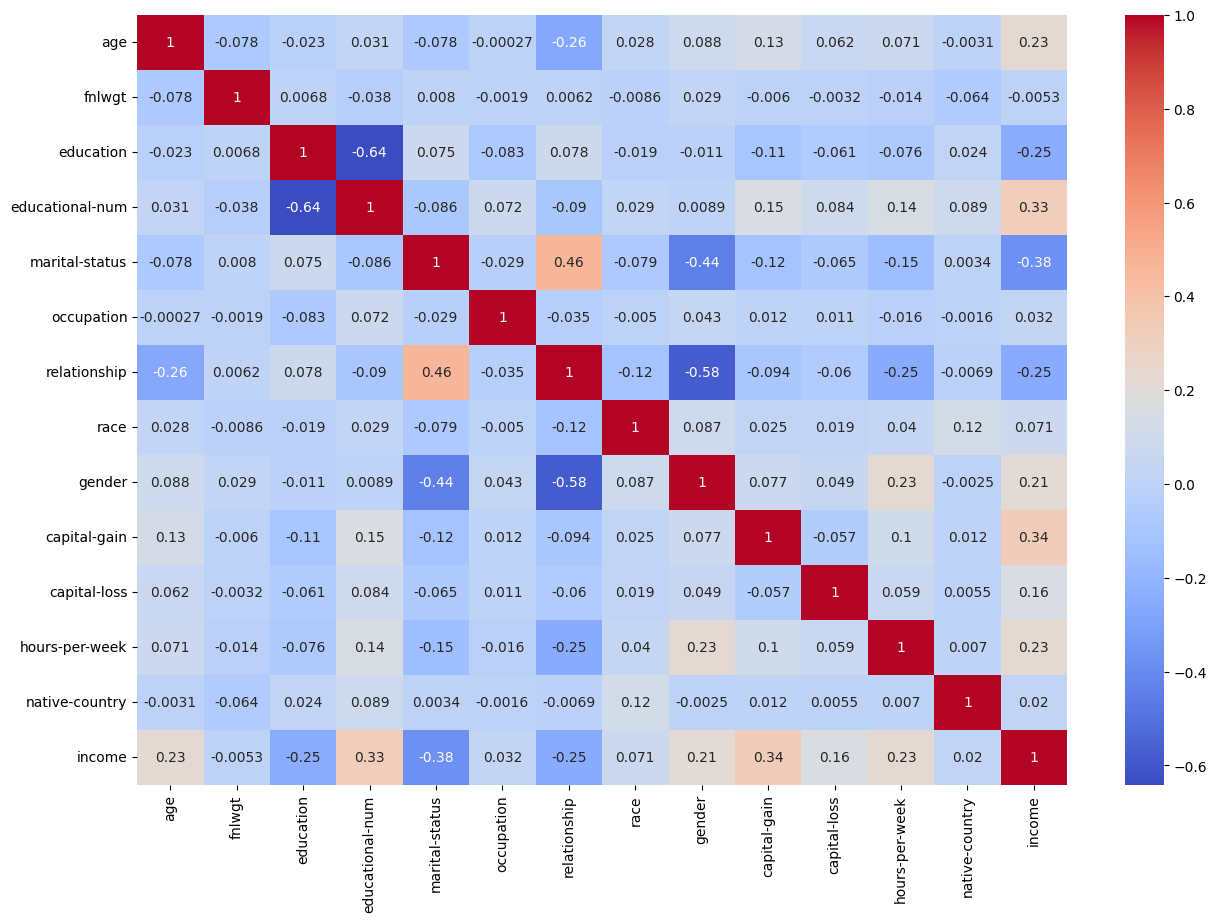

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(a,annot=True,cmap='coolwarm')
plt.show()

In [66]:
l1=['fnlwgt','marital-status','relationship','education','race','occupation','native-country','capital-loss']
for i in l1:
    df1=df1.drop(columns=i)

### Logistic Regression Classifier

In [67]:
X=df1.drop('income',axis=1)
y=df1.income

In [212]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [187]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [188]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((33996, 5), (14570, 5), (14570,), (33996,))

In [189]:
accuracies={}

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
lr=LogisticRegression()
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [191]:
accuracy_score(y_test,prediction1)

0.8166781056966369

In [192]:
print("Classification Report:\n {}".format(classification_report(y_test, prediction1)))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11025
           1       0.71      0.42      0.53      3545

    accuracy                           0.82     14570
   macro avg       0.77      0.68      0.71     14570
weighted avg       0.80      0.82      0.80     14570



In [193]:
accuracies['Logistic regression'] = np.round(lr.score(X_test, y_test) * 100,3)


### Decision Tree Classifier 

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report,confusion_matrix

In [196]:
dtc= DecisionTreeClassifier()

In [197]:
model2=dtc.fit(X_train,y_train)

In [198]:
prediction2=model2.predict(X_test)

In [199]:
print('accuracy_score',accuracy_score(y_test,prediction2))

accuracy_score 0.8095401509951956


In [200]:
print("Classification Report:\n {}".format(classification_report(y_test, prediction2)))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     11025
           1       0.65      0.47      0.55      3545

    accuracy                           0.81     14570
   macro avg       0.75      0.70      0.71     14570
weighted avg       0.80      0.81      0.80     14570



In [201]:
accuracies['Decision Tree'] = np.round(dtc.score(X_test, y_test) * 100,3)

### Random Forest Classifier


In [202]:
from sklearn.ensemble import  RandomForestClassifier

In [203]:
rfc=RandomForestClassifier()

In [204]:
model3=rfc.fit(X_train,y_train)

In [205]:
prediction3=model3.predict(X_test)

In [206]:
accuracy_score(y_test,prediction3)

0.8164722031571723

In [207]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [208]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11025
           1       0.67      0.49      0.56      3545

    accuracy                           0.82     14570
   macro avg       0.76      0.71      0.72     14570
weighted avg       0.80      0.82      0.81     14570



In [209]:
print(confusion_matrix(y_test,prediction3))

[[10164   861]
 [ 1813  1732]]


<Axes: >

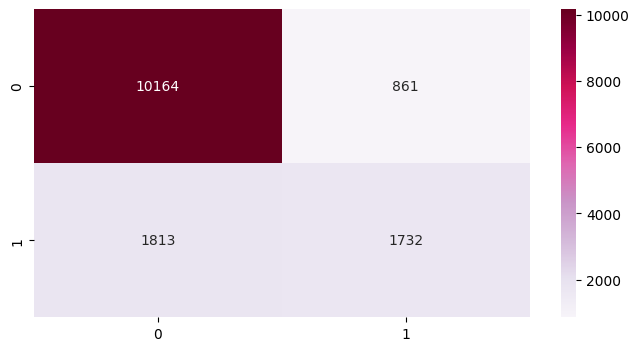

In [210]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,prediction3), annot=True, cmap='PuRd', fmt = 'd')

In [211]:
accuracies['Random Forest'] = np.round(rfc.score(X_test, y_test) * 100,3)

## Random Search View

In [93]:
#max_depth=[int(x) for x in np.linspace(3,50,20)]
#min_samples_split=[5,8,10,12,15]
#param_grid={'max_depth':max_depth,'min_samples_split':min_samples_split,'criterion':['entropy','gini impurity']}

In [94]:
#X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#grid_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                      #param_grid=param_grid)

In [96]:
#grid_model.fit(X_train, y_train)

In [97]:
#grid_model.best_estimator_

In [98]:
#criterion='entropy', max_depth=7, min_samples_split=15

In [213]:
max_depth=[int(x) for x in np.linspace(3,25,15)]
min_samples_split=[int(x) for x in np.linspace(3,10,10)]
param_grid={'max_depth':max_depth,'min_samples_split':min_samples_split}

In [214]:
rf_classifier = RandomForestClassifier(random_state=42)

In [215]:
Random_search = RandomizedSearchCV(rf_classifier, param_grid, cv=5,n_iter=100)  

In [216]:
Random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 4, 6, 7, 9, 10, 12, 14,
                                                      15, 17, 18, 20, 21, 23,
                                                      25],
                                        'min_samples_split': [3, 3, 4, 5, 6, 6,
                                                              7, 8, 9, 10]})

In [217]:
best_regressor = Random_search.best_estimator_
best_regressor

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [218]:
rf=RandomForestClassifier(max_depth=7, min_samples_split=12, random_state=42)

In [219]:
model4=rf.fit(X_train,y_train)

In [220]:
prediction5=model4.predict(X_test)

In [221]:
accuracy_score(y_test,prediction5)

0.8352779684282773

In [222]:
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     11025
           1       0.77      0.46      0.58      3545

    accuracy                           0.84     14570
   macro avg       0.81      0.71      0.74     14570
weighted avg       0.83      0.84      0.82     14570



## AdaBoost Classifier

In [223]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=100,
                              random_state=10)

#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,y_train)

Y_pred=model_AdaBoost.predict(X_test)

In [224]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11025
           1       0.66      0.47      0.55      3545

    accuracy                           0.81     14570
   macro avg       0.75      0.70      0.72     14570
weighted avg       0.80      0.81      0.80     14570



In [225]:
accuracies['Ada Boost '] = np.round(model_AdaBoost.score(X_test, y_test) * 100,3)

## XGB Classifier

In [226]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=500,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,y_train)

Y_pred=model_XGBoost.predict(X_test)

In [227]:
print(classification_report(y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11025
           1       0.73      0.49      0.59      3545

    accuracy                           0.83     14570
   macro avg       0.79      0.72      0.74     14570
weighted avg       0.82      0.83      0.82     14570



In [228]:
print(confusion_matrix(y_test,Y_pred))

[[10376   649]
 [ 1809  1736]]


<Axes: >

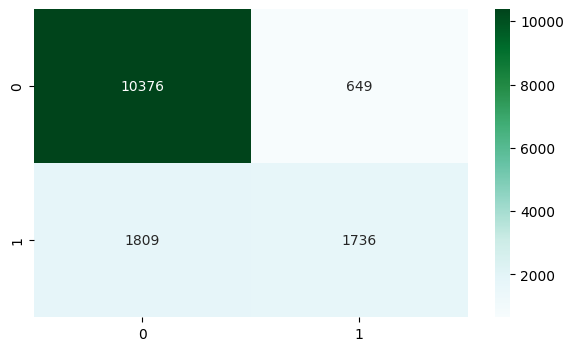

In [229]:
plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(y_test,Y_pred), annot=True, cmap='BuGn', fmt = 'd')

In [230]:
accuracies['XG Boost'] = np.round(model_XGBoost.score(X_test, y_test) * 100,3)

In [231]:
accuracies

{'Logistic regression': 81.668,
 'Decision Tree': 80.954,
 'Random Forest': 81.647,
 'Ada Boost ': 81.332,
 'XG Boost': 83.13}

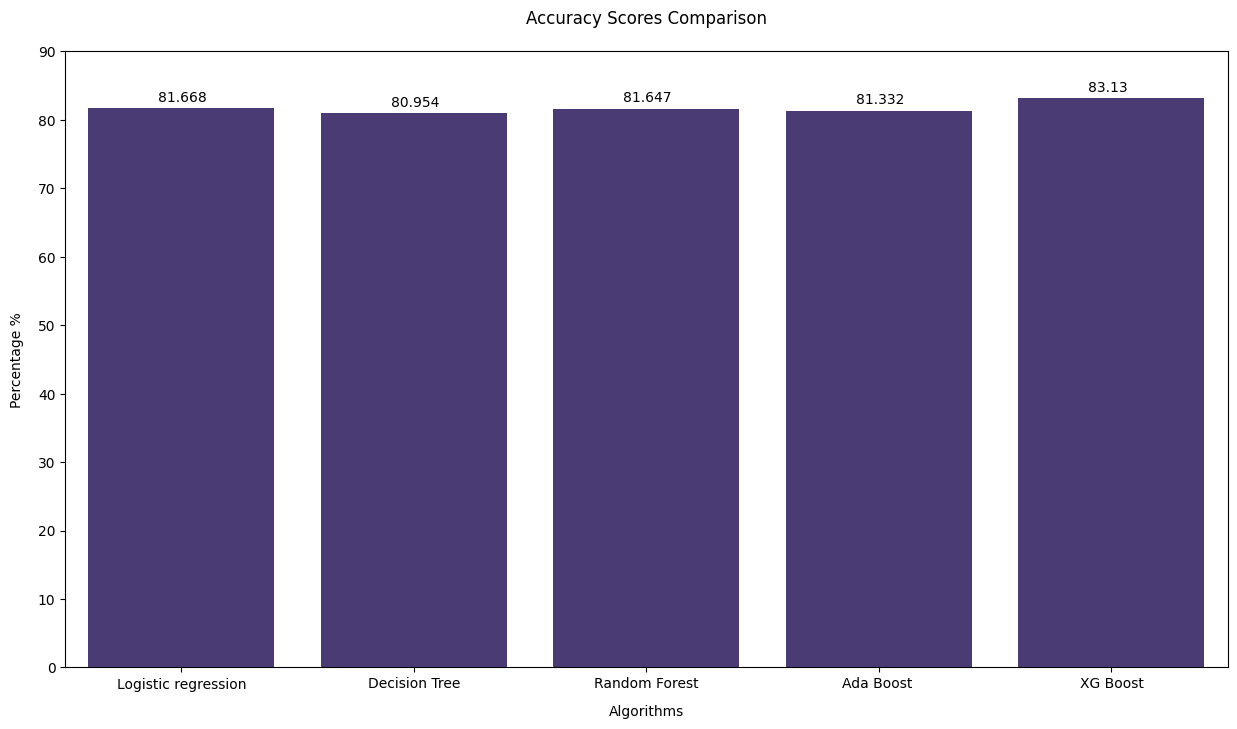

In [232]:
plt.figure(figsize=(15,8))
sns.set_palette('viridis')
ax=sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Percentage %',labelpad=10)
plt.xlabel('Algorithms',labelpad=10)
plt.title('Accuracy Scores Comparison',pad=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
plt.show()